In [78]:
from scipy.io import wavfile
import numpy as np
import os
import matplotlib.pyplot as plt   
import IPython.display as ipd

In [79]:
#path_1 = "data/wav/male.wav"
#path_2 = "data/wav/female.wav"

path_1 = "data/wav/female.wav"
path_2 = "data/wav/male.wav"

fs, x1 = wavfile.read(path_1)
fs, x2 = wavfile.read(path_2)

dB = 10;

x1 = x1/32767
x2 = x2/32767

print(x1.shape)
print(x2.shape)

if len(x1) > len(x2) : 
    t1 = x1
    t2 = np.pad(x2,(0,len(x1)-len(x2)))
else :
    t1 = np.pad(x1,(0,len(x2)-len(x1)))
    t2 = x2
    
y = t1 + t2
y = y/np.max(np.abs(y))

(57992,)
(37278,)


## x1

## x2

## y

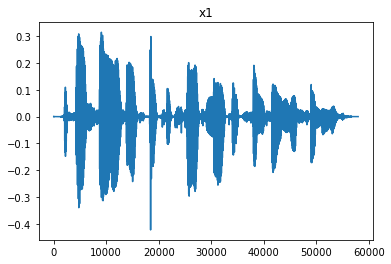

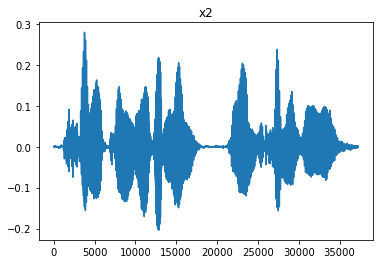

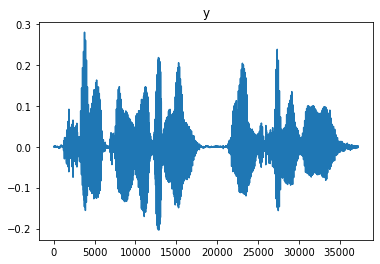

In [80]:
plt.figure()
plt.plot(x1)
plt.title("x1")
plt.figure()
plt.plot(x2)
plt.title("x2")
plt.figure()
plt.plot(x2)
plt.title("y")

ipd.display(ipd.Markdown('## x1'))
ipd.display(ipd.Audio(x1, rate=fs))
ipd.display(ipd.Markdown('## x2'))
ipd.display(ipd.Audio(x2, rate=fs))
ipd.display(ipd.Markdown('## y'))
ipd.display(ipd.Audio(y, rate=fs))

## Normalization

In [81]:
x1 = x1/np.max(np.abs(x1))
x2 = x2/np.max(np.abs(x2))

## Calculate Energy

In [82]:
e1 = np.sqrt(np.sum(np.power(x1,2))/len(x1))
e2 = np.sqrt(np.sum(np.power(x2,2))/len(x2))
print(e1)
print(e2)

0.11601461024466525
0.13004084985470632


## SNR weight

In [83]:
weight = (e1/e2) / (np.sqrt(np.power(10,dB/10))) 
x2 = x2*weight

if len(x1) > len(x2) : 
    t1 = x1
    t2 = np.pad(x2,(0,len(x1)-len(x2)))
else :
    t1 = np.pad(x1,(0,len(x2)-len(x1)))
    t2 = x2
    
y = t1 + t2
y = y/np.max(np.abs(y))

## x1

## x2

## y

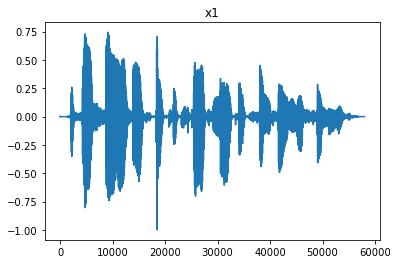

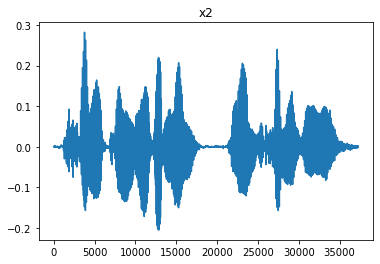

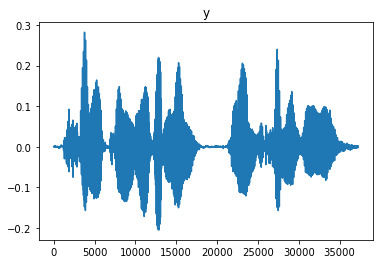

In [84]:
plt.figure()
plt.plot(x1)
plt.title("x1")
plt.figure()
plt.plot(x2)
plt.title("x2")
plt.figure()
plt.plot(x2)
plt.title("y")

ipd.display(ipd.Markdown('## x1'))
ipd.display(ipd.Audio(x1, rate=fs))
ipd.display(ipd.Markdown('## x2'))
ipd.display(ipd.Audio(x2, rate=fs))
ipd.display(ipd.Markdown('## y'))
ipd.display(ipd.Audio(y, rate=fs))